# CNN

In [8]:
#卷积层import mathimport math
import torch
import torch.nn as nn

# 生成一个批次的5x5输入矩阵，每个批次有3个通道
input_matrix = torch.randn(1, 3, 5, 5)
print("input_matrix:")
print(input_matrix)
print()

# 生成一个3x3的卷积核，每个卷积核有3个输入通道和1个输出通道
conv_kernel = torch.randn(1, 3, 3, 3)
print("conv_kernel: \n")
print(conv_kernel)
print()

# 定义卷积层
conv_layer = nn.Conv2d(in_channels=3, out_channels=1, kernel_size=3, stride=1, padding=0, bias=False)

# 设置卷积核
conv_layer.weight.data = conv_kernel

# 执行卷积操作
output = conv_layer(input_matrix)
print("output:")
print(output)

input_matrix:
tensor([[[[ 0.1896, -0.4442,  0.4664,  0.6017,  0.2567],
          [ 1.0317, -0.1184, -1.0997,  2.5387, -1.0058],
          [ 0.6131, -1.0036, -0.4360,  0.9597, -0.5162],
          [-1.2523,  0.9066, -0.3166, -0.2453, -0.8653],
          [ 1.2063, -1.6005,  0.9533,  0.0520, -1.0701]],

         [[-3.2067, -0.3119,  1.5240, -0.0324,  0.4157],
          [ 1.1122,  0.9658,  2.3864,  0.8556, -0.1306],
          [ 0.0889, -0.5585,  1.1700, -0.0506, -0.7495],
          [ 0.9370,  1.3360, -0.6642,  0.1062, -0.7444],
          [ 0.9130, -1.0472,  0.0999, -0.1688, -0.8956]],

         [[ 0.0706, -0.0521, -0.0759, -1.6406, -0.2820],
          [-1.5695, -0.5305, -0.4993, -1.0297, -1.3826],
          [-0.4976,  1.3095, -2.4534,  2.7348,  0.0545],
          [ 0.2570,  0.7686,  0.9316,  1.6645,  0.0098],
          [ 0.2178,  0.3073,  0.0109, -0.2659, -2.6151]]]])

conv_kernel: 

tensor([[[[-0.5690,  2.2770, -0.4867],
          [-1.1939, -0.9883, -1.4106],
          [ 1.6419,  0.0615, -

# 计算卷积

In [9]:
import numpy as np

# 输入矩阵
R = np.array([[4, 5, 0, 3, 3, 3, 1],
              [3, 5, 5, 4, 0, 0, 4],
              [2, 1, 0, 1, 5, 1, 5],
              [0, 1, 4, 3, 0, 3, 5],
              [0, 2, 3, 0, 1, 3, 5],
              [3, 3, 0, 1, 1, 1, 0],
              [2, 4, 3, 3, 2, 4, 2]])

G = np.array([[0, 0, 4, 5, 5, 0, 4],
              [1, 4, 1, 2, 2, 0, 1],
              [1, 1, 1, 3, 3, 2, 3],
              [0, 3, 5, 4, 1, 2, 4],
              [3, 4, 4, 4, 3, 4, 4],
              [4, 0, 3, 4, 2, 5, 5],
              [5, 0, 1, 5, 1, 3, 0]])

B = np.array([[5, 0, 1, 2, 4, 2, 0],
              [5, 3, 2, 2, 5, 0, 5],
              [1, 0, 2, 2, 3, 2, 3],
              [2, 1, 2, 3, 3, 3, 2],
              [3, 4, 1, 2, 3, 1, 2],
              [1, 4, 2, 5, 0, 3, 2],
              [3, 0, 0, 0, 3, 2, 3]])

# 卷积核
K_R = np.array([[0, 0, 0],
                [1, 0, 0],
                [1, 0, 1]])

K_G = np.array([[0, 0, 0],
                [1, 1, 0],
                [1, 1, 1]])

K_B = np.array([[1, 1, 0],
                [0, 0, 1],
                [0, 1, 1]])

# 卷积操作
def convolve2d(matrix, kernel):
    output_shape = (matrix.shape[0] - kernel.shape[0] + 1, matrix.shape[1] - kernel.shape[1] + 1)
    output = np.zeros(output_shape) # 初始化输出矩阵
    for i in range(output_shape[0]):
        for j in range(output_shape[1]):
            output[i, j] = np.sum(matrix[i:i+kernel.shape[0], j:j+kernel.shape[1]] * kernel)
    return output

# 对每个通道进行卷积
conv_R = convolve2d(R, K_R)
conv_G = convolve2d(G, K_G)
conv_B = convolve2d(B, K_B)

# 合并通道结果
final_output = conv_R + conv_G + conv_B

print("Convolution result for R channel:\n", conv_R)
print("Convolution result for G channel:\n", conv_G)
print("Convolution result for B channel:\n", conv_B)
print("Final output:\n", final_output)


Convolution result for R channel:
 [[ 5.  7. 10.  6. 10.]
 [ 6.  5.  4.  7. 10.]
 [ 3.  3.  8.  6.  6.]
 [ 3.  6.  4.  2.  2.]
 [ 8. 10.  5.  8.  5.]]
Convolution result for G channel:
 [[ 8. 10. 10. 12. 10.]
 [10. 14. 14. 13. 12.]
 [14. 20. 20. 16. 14.]
 [14. 15. 17. 18. 19.]
 [10.  9. 14. 15. 11.]]
Convolution result for B channel:
 [[ 9.  7. 13. 11. 16.]
 [13. 12. 13. 15. 13.]
 [ 8.  8. 12. 12. 10.]
 [10. 12. 13. 10. 13.]
 [ 9. 10.  6. 13. 11.]]
Final output:
 [[22. 24. 33. 29. 36.]
 [29. 31. 31. 35. 35.]
 [25. 31. 40. 34. 30.]
 [27. 33. 34. 30. 34.]
 [27. 29. 25. 36. 27.]]


# CNN实战

In [10]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
import os
import math

# 定义模型
class CNN(nn.Module):
    def __init__(self):
        # 卷积层
        super(CNN, self).__init__() #继承nn.Module提供的方法和属性
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        # 池化层
        self.pool = nn.MaxPool2d(2, 2)
        # 全连接第一层
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.bn1 = nn.BatchNorm1d(128) #batch_normalization
        # 全连接第二层
        self.dropout = nn.Dropout(0.5)
        self.fc2 = nn.Linear(128, 64)
        # 全连接第三层
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        # 两层卷积加池化
        x = self.pool(self.conv1(x))
        x = self.pool(self.conv2(x))
        # 展平
        x = x.view(-1, 64 * 7 * 7)
        # 全连接第一层:全连接-bn-ReLU
        x = self.fc1(x)
        x = self.bn1(x)
        x = F.relu(x)
        # 全连接第二层:dropout-全连接-ReLU
        x = self.dropout(x)
        x = self.fc2(x)
        x = F.relu(x)
        # 全连接第三层:全连接
        x = self.fc3(x)
        return x


# 保存图片
def save_images(images, true_labels, predicted_labels, epoch, image_counter):
    # 每次显示64张图片
    num_images_to_show = 64
    # enumerate序列：图片、真实标签、预测标签
    images_to_show = images[:num_images_to_show]
    true_labels_show = true_labels[:num_images_to_show].cpu().numpy()
    predicted_labels_show = predicted_labels[:num_images_to_show].cpu().numpy()

    # 创建一个图形窗口fig和子图axes
    num_rows = math.ceil(num_images_to_show / 8)  # 向上取整
    fig, axes = plt.subplots(num_rows, 8, figsize=(15, 15))
    # 如果 num_rows 大于 1，axes 可能是一个二维数组
    if num_rows > 1:
        axes = np.atleast_2d(axes)  # 确保 axes 是二维数组

    # 遍历图像和标签
    for idx, (image, true_label, predicted_label) in enumerate(zip(images_to_show, true_labels_show, predicted_labels_show)):
        row = idx // 8
        col = idx % 8
        axes[row, col].imshow(image.squeeze().numpy(), cmap='gray')
        axes[row, col].set_title(f'True: {true_label}, Pred: {predicted_label}')
        axes[row, col].axis('off')
        # 错误标签
        if true_label != predicted_label:
            axes[row, col].text(0.5, 0.5, 'Wrong',
                                 horizontalalignment='center',
                                 verticalalignment='center',
                                 color='red',
                                 fontsize=12,
                                 weight='bold',
                                 transform=axes[row, col].transAxes)

    # 保存图像
    save_dir = './picture'
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)
    plt.savefig(os.path.join(save_dir, f"Epoch{epoch}_Count{image_counter}.png"), bbox_inches='tight')
    plt.close(fig)  # 保存后关闭图形，以避免显示在屏幕上


# 训练前准备
# 定义超参数
batch_size = 64
learning_rate = 0.001
num_epochs = 10

# 加载和预处理数据
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

train_dataset = datasets.MNIST(root='dataset', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='dataset', train=False, transform=transform)

train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

#初始化模型
model = CNN()
# 定义损失函数和优化器
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
# 初始化损失列表
train_losses = []
valid_losses = []

#训练+评估
for epoch in range(num_epochs):
    image_count = 1 #保存图片序号
    train_loss = 0.0
    model.train()  # 设置模型为训练模式
    for i, (images, labels) in enumerate(train_loader):
        outputs = model(images)
        loss = criterion(outputs, labels)
        _, predicted = torch.max(outputs, 1)  # 找到预测的最大可能性的索引
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_loss += loss.item()  # 累加损失值

        if (i+1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(train_loader)}], Loss: {loss.item():.4f}')
            save_images(images, labels, predicted, epoch+1, image_count)  # 保存图片和标签
            image_count += 1
    
    train_losses.append(train_loss / len(train_loader))  # 计算平均损失并添加到列表
    
    # 评估模型
    model.eval()
    test_loss = 0.0
    with torch.no_grad():
        correct = 0
        total = 0
        for images, labels in test_loader:
            outputs = model(images)
            loss = criterion(outputs, labels)
            test_loss += loss.item()
            
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    valid_losses.append(test_loss / len(test_loader))  # 添加到验证损失列表
    print(f'Epoch {epoch+1}/{num_epochs}, Average Train Loss: {train_loss / len(train_loader)}, '
          f'Validation Loss: {test_loss / len(test_loader)}')
    
    print(f'Accuracy of the network on the 10000 test images: {100 * correct / total}%')
 
# 绘制损失曲线
plt.figure(figsize=(10, 5)) 
plt.plot(train_losses, label='Train Loss')
plt.plot(valid_losses, label='Validation Loss')
plt.title('Loss Curves')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
save_dir = './loss_curves'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)
plt.savefig(os.path.join(save_dir, 'loss_curve.png'))

KeyboardInterrupt: 

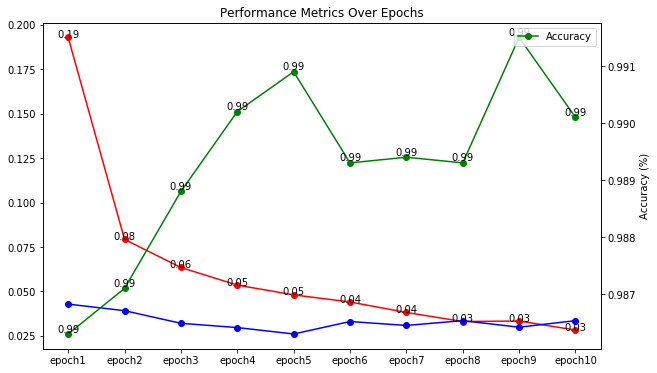

In [1]:
# 绘制误差图
import matplotlib.pyplot as plt
import os

# 数据
epochs = ['epoch1', 'epoch2', 'epoch3', 'epoch4', 'epoch5', 'epoch6', 'epoch7', 'epoch8', 'epoch9', 'epoch10']
train_errors = [19.29 *0.01, 7.93*0.01, 6.35*0.01, 5.36*0.01, 4.81*0.01, 4.41*0.01, 3.82*0.01, 3.31*0.01, 3.34*0.01, 2.83*0.01]
validation_errors = [4.29*0.01, 3.92*0.01, 3.21*0.01, 2.97*0.01, 2.61*0.01, 3.31*0.01, 3.09*0.01, 3.36*0.01, 2.99*0.01, 3.36*0.01]

# 创建图形
plt.figure(figsize=(10, 6))

# 绘制训练误差和验证误差的折线图
plt.plot(epochs, train_errors, marker='o', color='red', label='Training Error')
plt.plot(epochs, validation_errors, marker='o', color='blue', label='Validation Error')

# 在每个点上显示数据
for i, epoch in enumerate(epochs):
    plt.text(i, train_errors[i], f'{train_errors[i]:.4f}', ha='center')
    plt.text(i, validation_errors[i], f'{validation_errors[i]:.4f}', ha='center')

# 添加图例
plt.legend(loc='upper right')


# 添加标题和轴标签
plt.title('Errors Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Error')

# 保存图表
save_dir = './loss_curves'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)
plt.savefig(os.path.join(save_dir, 'loss_curve.png'))


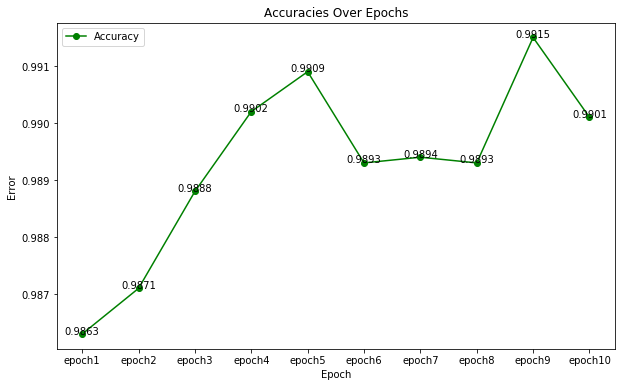

In [4]:
# 绘制精准度图
import matplotlib.pyplot as plt
import os

# 数据
epochs = ['epoch1', 'epoch2', 'epoch3', 'epoch4', 'epoch5', 'epoch6', 'epoch7', 'epoch8', 'epoch9', 'epoch10']
accuracies = [98.63*0.01, 98.71*0.01, 98.88*0.01, 99.02*0.01, 99.09*0.01, 98.93*0.01, 98.94*0.01, 98.93*0.01, 99.15*0.01, 99.01*0.01]

# 创建图形
plt.figure(figsize=(10, 6))

# 绘制精确度的折线图
plt.plot(epochs, accuracies, marker='o', color='green', label='Accuracy')


# 在每个点上显示数据
for i, epoch in enumerate(epochs):
    plt.text(i, accuracies[i], f'{accuracies[i]:.4f}', ha='center')

# 添加图例
plt.legend()

# 添加标题和轴标签
plt.title('Accuracies Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Error')

# 保存图表
save_dir = './loss_curves'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)
plt.savefig(os.path.join(save_dir, 'accuracies_curve.png'))


